In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import plotly
#plotly.tools.set_credentials_file(username="rajnish_488", api_key="b0szlCBC8nhrXhOlZlNm")

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
data=pd.read_csv("D:\ML\Star Radiation Analysis and Prediction\Dataset\SolarPrediction.csv")

In [4]:
print(data.head())

     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [6]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


# Data Extraction

In [7]:
# filling all the data with na or null

data['Radiation'].fillna(data['Radiation'].mean(), inplace = True)
data['Temperature'].fillna(data['Temperature'].mean(), inplace = True)
data['Pressure'].fillna(data['Pressure'].mean(), inplace = True)
data['Humidity'].fillna(data['Humidity'].mean(), inplace = True)
data['WindDirection(Degrees)'].fillna(data['WindDirection(Degrees)'].mean(), inplace = True)
data['Speed'].fillna(data['Speed'].mean(), inplace = True)

In [8]:
#converting the data values
data["Data"]=pd.to_datetime(data["Data"]).dt.date.astype(str)

def changefloat(x):
    return float(x)
def changeint(x):
    return int(x)


data["Humidity"]=data["Humidity"].apply(lambda x: changefloat(x))
data["WindDirection(Degrees)"]=data["WindDirection(Degrees)"].apply(lambda x: changeint(x))

In [9]:
def pre(x):
    return float(x-30)
data["Pressure"]=data["Pressure"].apply(lambda x: pre(x))

In [10]:
def y(x):
    w=[]
    w=x.split("-")
    return int(w[0])
def m(x):
    w=[]
    w=x.split("-")
    return int(w[1])
def d(x):
    w=[]
    w=x.split("-")
    return int(w[1])

data["Year"]=data["Data"].apply(lambda x: y(x))
data["Month"]=data["Data"].apply(lambda x: m(x))
data["Date"]=data["Data"].apply(lambda x: m(x))

data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Year,Month,Date
0,1475229326,2016-09-29,23:55:26,1.21,48,0.46,59.0,177,5.62,06:13:00,18:13:00,2016,9,9
1,1475229023,2016-09-29,23:50:23,1.21,48,0.46,58.0,176,3.37,06:13:00,18:13:00,2016,9,9
2,1475228726,2016-09-29,23:45:26,1.23,48,0.46,57.0,158,3.37,06:13:00,18:13:00,2016,9,9
3,1475228421,2016-09-29,23:40:21,1.21,48,0.46,60.0,137,3.37,06:13:00,18:13:00,2016,9,9
4,1475228124,2016-09-29,23:35:24,1.17,48,0.46,62.0,104,5.62,06:13:00,18:13:00,2016,9,9


Text(0.5, 1.0, 'the data of the value which are null in a bar format')

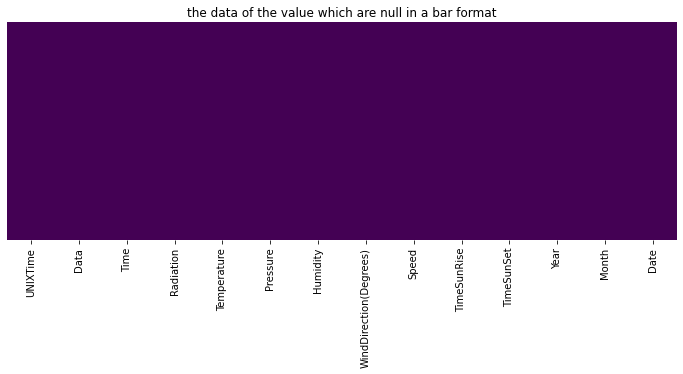

In [11]:
#getting the data info of the values missed
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap="viridis",yticklabels=False)
plt.title("the data of the value which are null in a bar format")

In [14]:
data.to_csv("D:\ML\Star Radiation Analysis and Prediction\Datasetcleandata.csv")


# Data Visvalization

<AxesSubplot:>

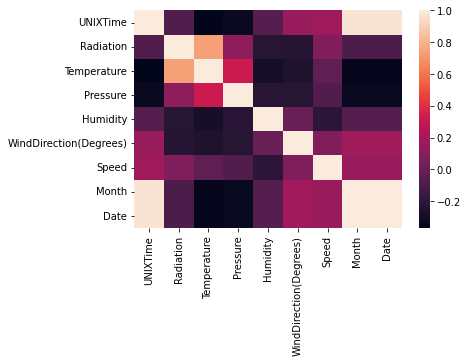

In [15]:
data1=data.drop(["Year"], axis=1,inplace=False)
fig1=data1.corr()
sns.heatmap(fig1)
#color corelation plot of the data

<AxesSubplot:>

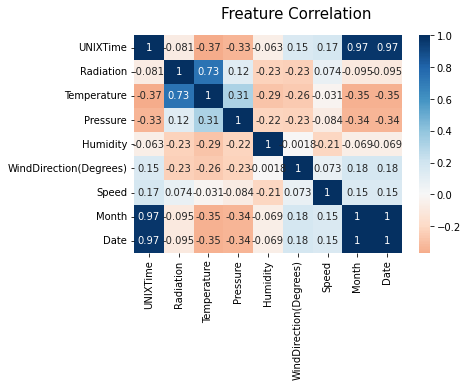

In [16]:
fig2=plt.figure()
fig2.suptitle("Freature Correlation", fontsize=15)
sns.heatmap(data1.corr(),annot=True,cmap='RdBu',center=0)

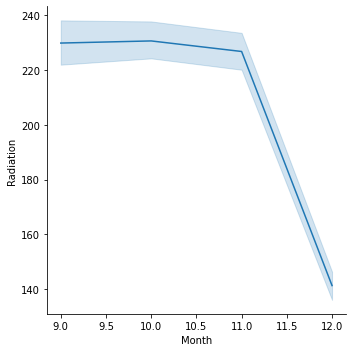

In [17]:
sns.relplot(data=data, x="Month", y="Radiation",  kind="line")

<AxesSubplot:xlabel='Pressure', ylabel='Speed'>

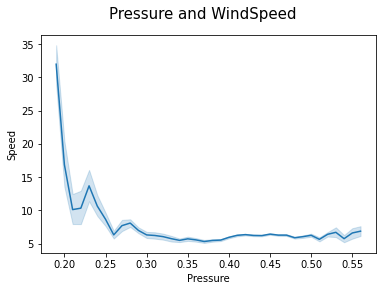

In [18]:
fig2=plt.figure()
fig2.suptitle("Pressure and WindSpeed", fontsize=15)
sns.lineplot(data=data,x="Pressure",y="Speed")


<AxesSubplot:xlabel='Temperature', ylabel='Humidity'>

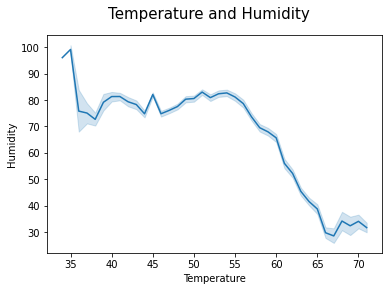

In [19]:
fig2=plt.figure()
fig2.suptitle("Temperature and Humidity", fontsize=15)
sns.lineplot(data=data,x="Temperature",y="Humidity")

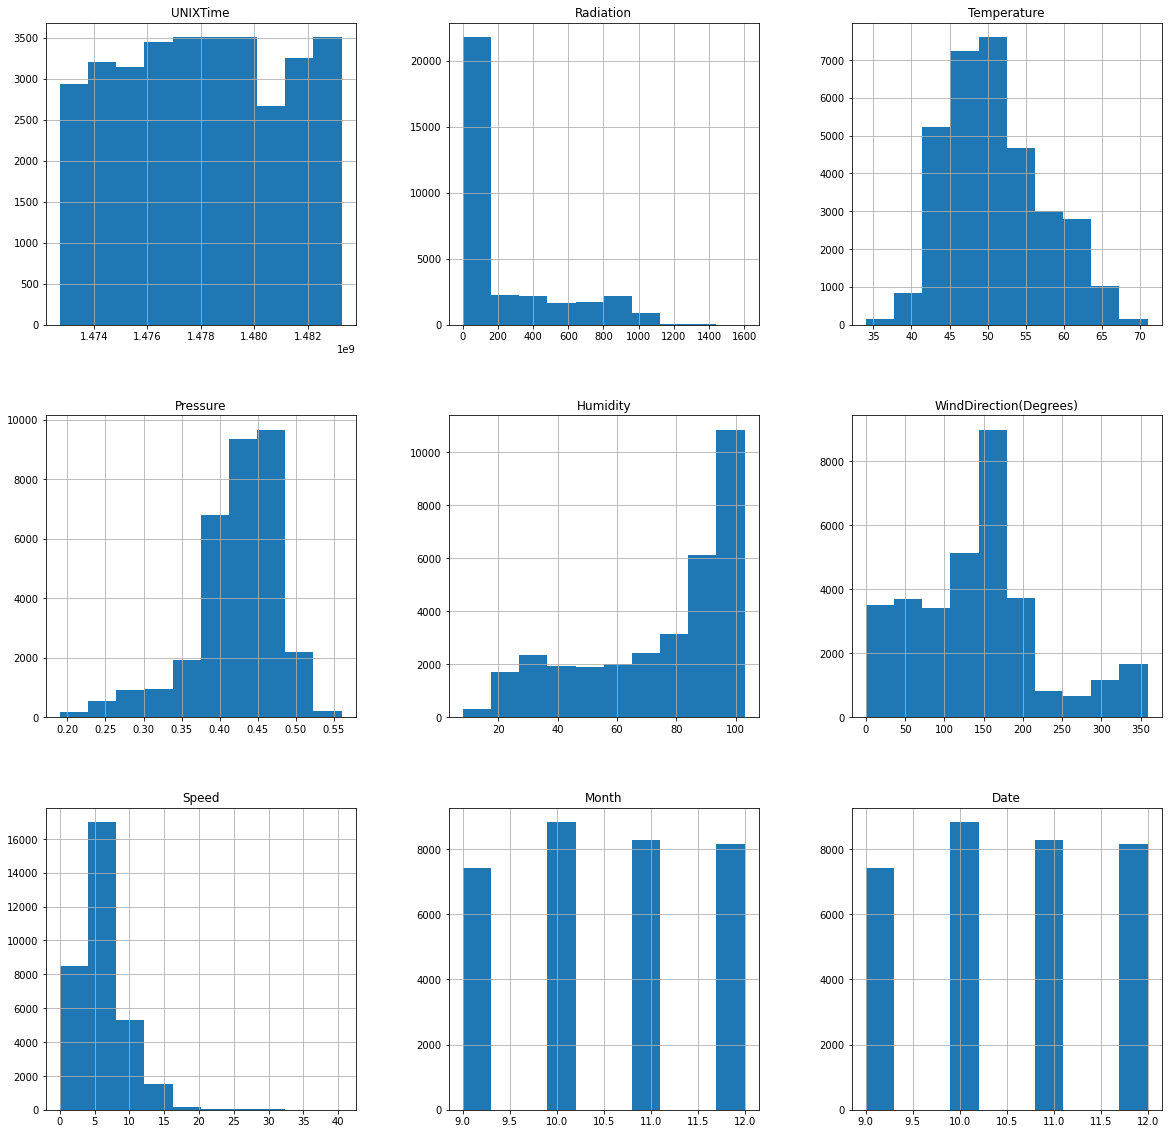

In [20]:
p=data1.hist(figsize=(20,20))